In [1]:
import sys

sys.path.append('/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages')
sys.path.append('/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/scalpy/')
sys.path.append('/home/aklantbhowmick/anaconda3/envs/nbodykit-env/lib/python3.6/site-packages/')

import arepo_package
import scipy.interpolate
import h5py
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
def visualize_density_field(run,desired_redshift,p_type,uniform_run):
    output_path=path_to_output+run+'/output/'
    boxsize=arepo_package.get_box_size(output_path)
    
    particle_property='Coordinates'
    print('!!!')
    Positions,output_redshift=arepo_package.get_particle_property(output_path, particle_property, p_type, desired_redshift, list_all=True)
    print('!!!')
    xr=Positions[:,0]
    yr=Positions[:,1]
    zr=Positions[:,2]
    scaled_halo_centers=(numpy.load(path_to_output+run[:-6]+'/DIAGNOSTICS/Volume_parameters_for_MUSIC.npy'))[0]
    mask=(zr>(boxsize/2-scaled_halo_centers[2]*boxsize/2))&(zr<(boxsize/2+scaled_halo_centers[2]*boxsize/2))
    
    if ('zoom' in run):            
        
        aaa=1
        
        xr=xr-(boxsize/2)+scaled_halo_centers[0]*boxsize
        yr=yr-(boxsize/2)+scaled_halo_centers[1]*boxsize
        zr=zr-(boxsize/2)+scaled_halo_centers[2]*boxsize

        xr[xr<0]+=boxsize
        xr[xr>boxsize]-=boxsize
        zr[zr<0]+=boxsize
        zr[zr>boxsize]-=boxsize
        yr[yr<0]+=boxsize
        yr[yr>boxsize]-=boxsize
    
    
    f,ax=plt.subplots(1,1,figsize=(10,10))
    obj=ax
    NBINS=300
    opacity=1
    maskr=zr==zr#(z>12000)&(z<14000)
    obj.set_facecolor('xkcd:white')
    
   # obj.hist2d(xr[maskr],yr[maskr], bins=(NBINS,NBINS), norm=mpl.colors.LogNorm(),cmap='Blues_r',alpha=opacity);
    if ((p_type==1)&('zoom' in run)):
            Positions,output_redshift=arepo_package.get_particle_property(output_path, particle_property,2, desired_redshift, list_all=False)
            x=Positions[:,0]
            y=Positions[:,1]
            z=Positions[:,2]
            
            x=x-(boxsize/2)+scaled_halo_centers[0]*boxsize
            y=y-(boxsize/2)+scaled_halo_centers[1]*boxsize
            z=z-(boxsize/2)+scaled_halo_centers[2]*boxsize
            

            x[x<0]+=boxsize
            x[x>boxsize]-=boxsize
            z[z<0]+=boxsize
            z[z>boxsize]-=boxsize
            y[y<0]+=boxsize
            y[y>boxsize]-=boxsize



                   
            obj=ax
            NBINS=300
            opacity=1
            mask=z==z #(z>12000)&(z<14000)(z==z)
            obj.set_facecolor('xkcd:white')

            obj.hist2d(x[mask],y[mask], bins=(NBINS,NBINS), norm=mpl.colors.LogNorm(),cmap='Blues_r',alpha=opacity);
            obj.hist2d(xr[maskr],yr[maskr], bins=(NBINS,NBINS), norm=mpl.colors.LogNorm(),cmap='Greys_r',alpha=opacity);
            obj.hist2d(x[mask],y[mask], bins=(NBINS,NBINS), norm=mpl.colors.LogNorm(),cmap='Blues_r',alpha=0);
 
    else:       
            obj.hist2d(xr[maskr],yr[maskr], bins=(NBINS,NBINS), norm=mpl.colors.LogNorm(),cmap='Greys_r',alpha=opacity);
            
            
    Positions,output_redshift=arepo_package.get_particle_property(output_path, particle_property, 5, desired_redshift, list_all=False)
    x=Positions[:,0]
    y=Positions[:,1]
    z=Positions[:,2]

    mask=(z>(boxsize/2-scaled_halo_centers[2]*boxsize/2))&(z<(boxsize/2+scaled_halo_centers[2]*boxsize/2))
    #mask=z==z
    if ('zoom' in run):
        x=x-(boxsize/2)+scaled_halo_centers[0]*boxsize
        y=y-(boxsize/2)+scaled_halo_centers[1]*boxsize
        z=z-(boxsize/2)+scaled_halo_centers[2]*boxsize

        x[x<0]+=boxsize
        x[x>boxsize]-=boxsize
        z[z<0]+=boxsize
        z[z>boxsize]-=boxsize
        y[y<0]+=boxsize
        y[y>boxsize]-=boxsize
        
        
    
    
    

    #boxsize=25000

    #(((z>12500-0.2*12500)&(z<12500+0.2*12500))&((x>12500-0.2*12500)&(x<12500+0.2*12500)))&((y>12500-0.2*12500)&(y<12500+0.2*12500)) #(z>12000)&(z<14000)

    group_property='GroupMassType'
    GroupMassType,output_reds=arepo_package.get_group_property(output_path, group_property, desired_redshift, list_all=False)
    Masstype1=GroupMassType[:,1]*1e10
    Masstype2=GroupMassType[:,2]*1e10
    Masstype0=GroupMassType[:,0]*1e10
    Masstype4=GroupMassType[:,4]*1e10
        
    Masstype5=GroupMassType[:,5]*1e10

    Masstype104=Masstype1+Masstype0+Masstype4
    group_property='GroupPos'
    grouppositions,output_reds=arepo_package.get_group_property(output_path, group_property, desired_redshift, list_all=False)

    
        
    
    xg=grouppositions[:,0]
    yg=grouppositions[:,1]
    zg=grouppositions[:,2]
    

    
    
    maskg=(Masstype1+Masstype2)>5e10
    mask_zg=(zg>(boxsize/2-0.2*boxsize/2))&(zg<(boxsize/2+0.2*boxsize/2))
    if ('zoom' in run):
        xg=xg-(boxsize/2)+scaled_halo_centers[0]*boxsize
        yg=yg-(boxsize/2)+scaled_halo_centers[1]*boxsize
        zg=zg-(boxsize/2)+scaled_halo_centers[2]*boxsize

        xg[xg<0]+=boxsize
        xg[xg>boxsize]-=boxsize
        zg[zg<0]+=boxsize
        zg[zg>boxsize]-=boxsize
        yg[yg<0]+=boxsize
        yg[yg>boxsize]-=boxsize
    mask_bh=(Masstype5)>0
    
    
    maskg=maskg&mask_zg
    pth_to_output='/ufrc/lblecha/aklantbhowmick/arepo_runs_aklant/'
    output_path=pth_to_output+uniform_run+'/output/'
    boxsize=arepo_package.get_box_size(output_path)
    
    particle_property='Coordinates'
    print('!!!')
    Positions,output_redshift=arepo_package.get_particle_property(output_path, particle_property, p_type, desired_redshift, list_all=True)
    print('!!!')
    xr=Positions[:,0]
    yr=Positions[:,1]
    zr=Positions[:,2]    

    f,ax=plt.subplots(1,1,figsize=(10,10))
    obj=ax
    NBINS=300
    opacity=1
    maskr=zr==zr#(z>12000)&(z<14000)
    obj.set_facecolor('xkcd:white')
    
    obj.hist2d(xr[maskr],yr[maskr], bins=(NBINS,NBINS), norm=mpl.colors.LogNorm(),cmap='Blues_r',alpha=opacity);
    obj.errorbar([scaled_halo_centers[0]*boxsize],[scaled_halo_centers[1]*boxsize],marker='o',ms=100,color='grey',alpha=0.7)
    
    #obj.errorbar(xg[maskg],yg[maskg],color='green',linewidth=0,marker='o',alpha=0.7,ms=15);
    #obj.errorbar(xg[maskg&mask_bh],yg[maskg&mask_bh],color='red',linewidth=0,marker='o');

        


!!!
Desired redshift:  3
Output redshift:  3.008131071630377
Output snapshot:  10
Below are the list of properties for ptype  1
dict_keys(['count', 'Coordinates', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'SubfindDensity', 'SubfindHsml', 'SubfindVelDisp', 'Velocities'])
!!!
!!!
Desired redshift:  3
Output redshift:  3.008131071630377
Output snapshot:  10
Below are the list of properties for ptype  1
dict_keys(['count', 'Coordinates', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'SubfindDensity', 'SubfindHsml', 'SubfindVelDisp', 'Velocities'])
!!!


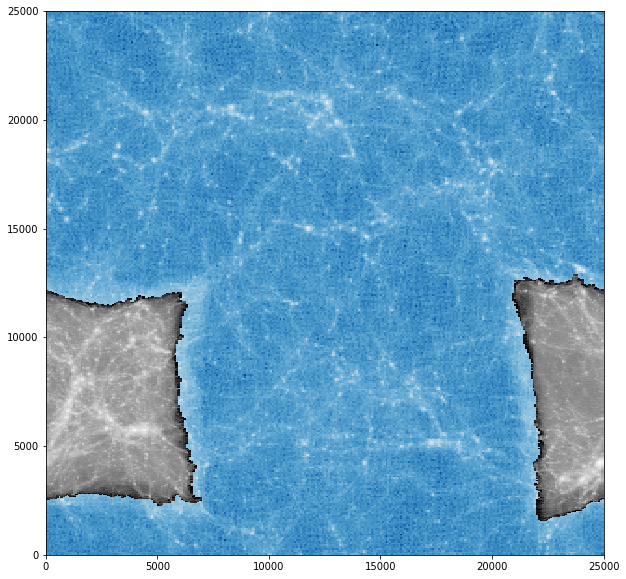

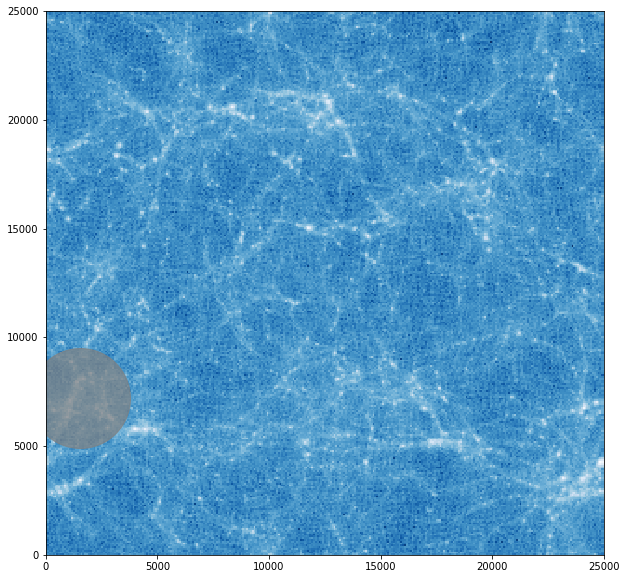

In [12]:

path_to_output='/ufrc/lblecha/aklantbhowmick/NEW_AREPO_RUNS/'

run='L25n128MUSIC_rerun_zoom_levelmax9_haloindex0_redshift0.00/AREPO/'
uniform_run='L25n128MUSIC_rerun'
desired_redshift=3
p_type=1
visualize_density_field(run,desired_redshift,p_type,uniform_run)



!!!
Desired redshift:  0
Output redshift:  3.008131071630377
Output snapshot:  10
Below are the list of properties for ptype  0
dict_keys(['count', 'AllowRefinement', 'CenterOfMass', 'Coordinates', 'Density', 'ElectronAbundance', 'EnergyDissipation', 'GFM_AGNRadiation', 'GFM_CoolingRate', 'GFM_Metallicity', 'GFM_Metals', 'GFM_MetalsTagged', 'GFM_WindDMVelDisp', 'GFM_WindHostHaloMass', 'HighResGasMass', 'InternalEnergy', 'Machnumber', 'MagneticField', 'MagneticFieldDivergence', 'Masses', 'NeutralHydrogenAbundance', 'ParticleIDs', 'Potential', 'Pressure', 'StarFormationRate', 'SubfindDMDensity', 'SubfindDensity', 'SubfindHsml', 'SubfindVelDisp', 'Velocities'])
!!!
!!!
Desired redshift:  0
Output redshift:  2.220446049250313e-16
Output snapshot:  20
Below are the list of properties for ptype  0
dict_keys(['count', 'CenterOfMass', 'Coordinates', 'Density', 'ElectronAbundance', 'EnergyDissipation', 'GFM_AGNRadiation', 'GFM_CoolingRate', 'GFM_Metallicity', 'GFM_Metals', 'GFM_MetalsTagged', '

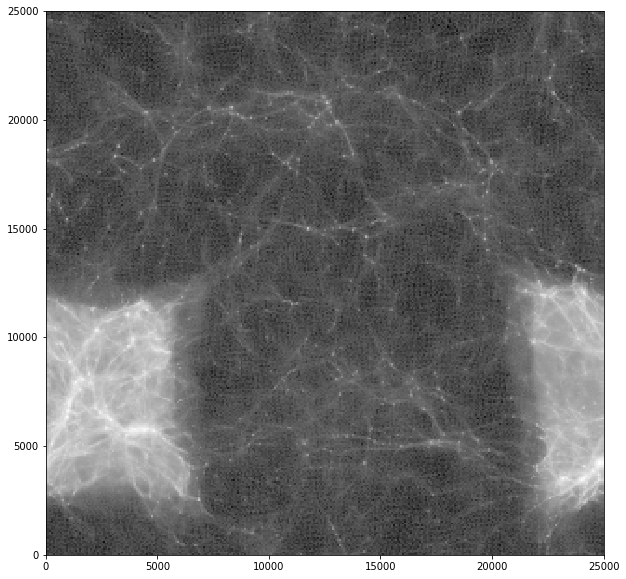

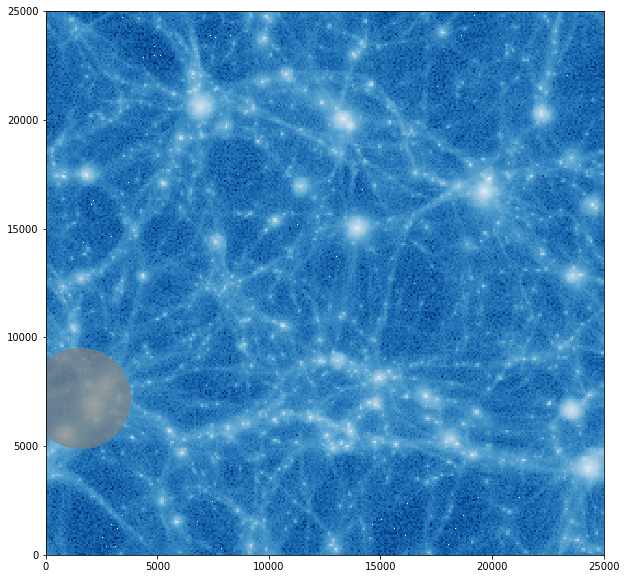

In [13]:

path_to_output='/ufrc/lblecha/aklantbhowmick/NEW_AREPO_RUNS/'

run='L25n128MUSIC_rerun_zoom_levelmax9_haloindex0_redshift0.00/AREPO/'
uniform_run='L25n128MUSIC_rerun'
desired_redshift=0
p_type=0
visualize_density_field(run,desired_redshift,p_type,uniform_run)



In [31]:
def compare_low_high_histograms(p_type):
    path_to_uniform_run='/ufrc/lblecha/aklantbhowmick/arepo_runs_aklant/'
    scaled_halo_centers=[0.439,0.116,0.227]
    uniform_run='L25n128MUSIC_rerun'
    basePath_uniform=path_to_uniform_run+uniform_run+'/output/'
    
    boxsize=arepo_package.get_box_size(basePath_uniform)
    particle_property='Coordinates'
    desired_redshift_of_selected_halo=3
    index_of_selected_halo=0
    
    
    path_to_output='/ufrc/lblecha/aklantbhowmick/NEW_AREPO_RUNS/'
    run='L25n128MUSIC_rerun_zoom_levelmax9_haloindex0_redshift0.00/AREPO/'
    basePath=path_to_output+run+'/output/'
    
    scaled_halo_centers=(numpy.load(path_to_output+run[:-6]+'/DIAGNOSTICS/Volume_parameters_for_MUSIC.npy'))[0]

    
    index_of_selected_halo_zoom=0

    group_particles,output_redshift=arepo_package.get_particle_property_within_groups(basePath_uniform,particle_property,p_type,desired_redshift_of_selected_halo,index_of_selected_halo,group_type='groups',list_all=True)

    GroupMass,output_redshift=arepo_package.get_group_property(basePath_uniform, 'GroupMass', desired_redshift_of_selected_halo, list_all=True)
    logHaloMass_selected=numpy.log10(GroupMass[index_of_selected_halo]*1e10)
    
    GroupMass_zoom,output_redshift_zoom=arepo_package.get_group_property(basePath, 'GroupMass', desired_redshift_of_selected_halo, list_all=True)
    
    diff_log_GroupMass=numpy.abs(numpy.log10(GroupMass_zoom*1e10)-logHaloMass_selected)
    indices=numpy.where(diff_log_GroupMass==min(diff_log_GroupMass))

    index_of_selected_halo=indices[0][0]

    group_particles_zoom,output_redshift=arepo_package.get_particle_property_within_groups(basePath,particle_property,p_type,desired_redshift_of_selected_halo,index_of_selected_halo_zoom,group_type='groups',list_all=False)
    
    f,ax=plt.subplots(figsize=(10,10))

    arepo_package.make_image(group_particles,group_particles,'xy',ax,boxsize,Nbin_low,scaled_halo_centers,colormap='Blues_r',opacity=1,about_COM=False)

    arepo_package.make_image(group_particles_zoom,group_particles_zoom,'xy',ax,boxsize,Nbin_high,scaled_halo_centers,colormap='Reds_r',opacity=0.3,about_COM=False,REPOSITION=True)


    


    f,ax=plt.subplots(figsize=(10,10))

    arepo_package.make_image(group_particles_zoom,group_particles_zoom,'xy',ax,boxsize,Nbin_high,scaled_halo_centers,colormap='Reds_r',opacity=1,about_COM=False,REPOSITION=True)

    
    arepo_package.make_image(group_particles,group_particles,'xy',ax,boxsize,Nbin_low,scaled_halo_centers,colormap='Blues_r',opacity=0.3,about_COM=False)

    
    
    ax.tick_params(labelsize=30)
    ax.set_xlabel('X (kpc)',fontsize=30)
    ax.set_ylabel('Y (kpc)',fontsize=30)

    #ax.set_ylim(5100,5500)
    #ax.set_xlim(10000,10500)

    #f,ax=plt.subplots(figsize=(10,10))
    #arepo_package.make_image(group_particles,group_particles,'xy',ax,boxsize,100,scaled_halo_centers,colormap='Blues_r',opacity=0.4,about_COM=False)
    #ax.tick_params(labelsize=30)
    #ax.set_xlabel('$X-X_{\mathrm{COM}}$',fontsize=30)
    #ax.set_ylabel('$Y-Y_{\mathrm{COM}}$',fontsize=30)

Below are the list of properties
dict_keys(['count', 'GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200'])
Below are the list of properties
dict_keys(['count', 'GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200'])


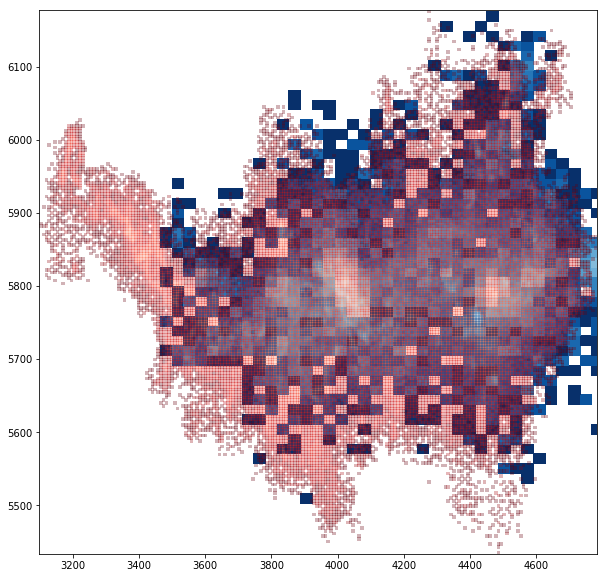

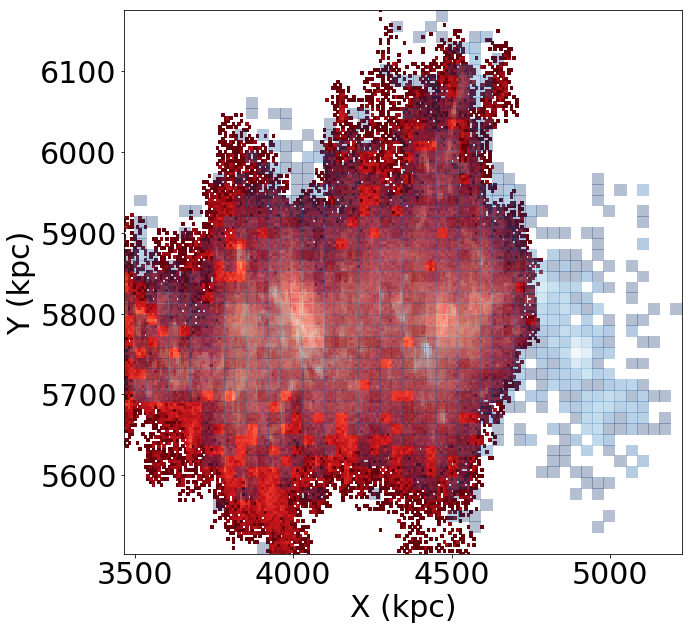

In [32]:
Nbin_low=50
Nbin_high=200
desired_redshift=0
compare_low_high_histograms(0)

Below are the list of properties
dict_keys(['count', 'GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200'])
Below are the list of properties
dict_keys(['count', 'GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200'])


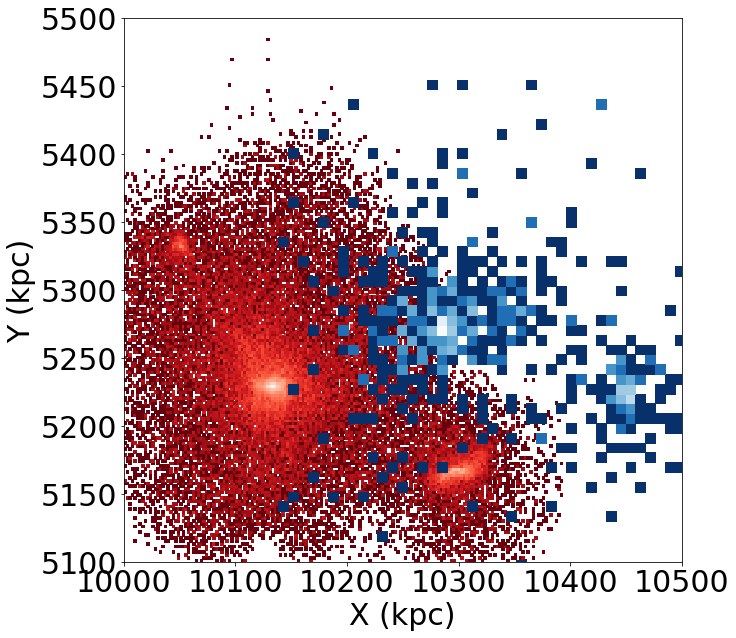

In [22]:
Nbin_low=50
Nbin_high=200
desired_redshift=0
compare_low_high_histograms(0)

Below are the list of properties
dict_keys(['count', 'GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200'])
Below are the list of properties
dict_keys(['count', 'GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200'])


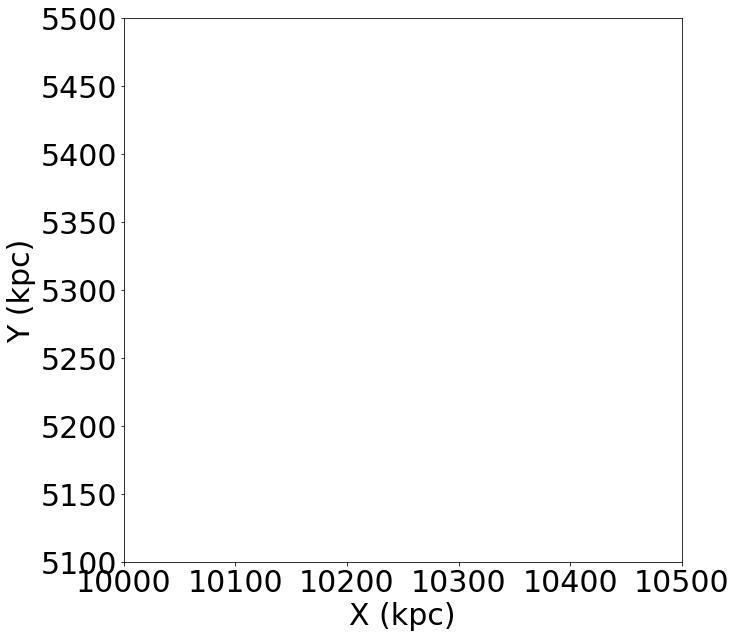

In [5]:
Nbin_low=50
Nbin_high=200
desired_redshift=0
compare_low_high_histograms(0)

Below are the list of properties
dict_keys(['count', 'GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200'])
Below are the list of properties
dict_keys(['count', 'GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200'])


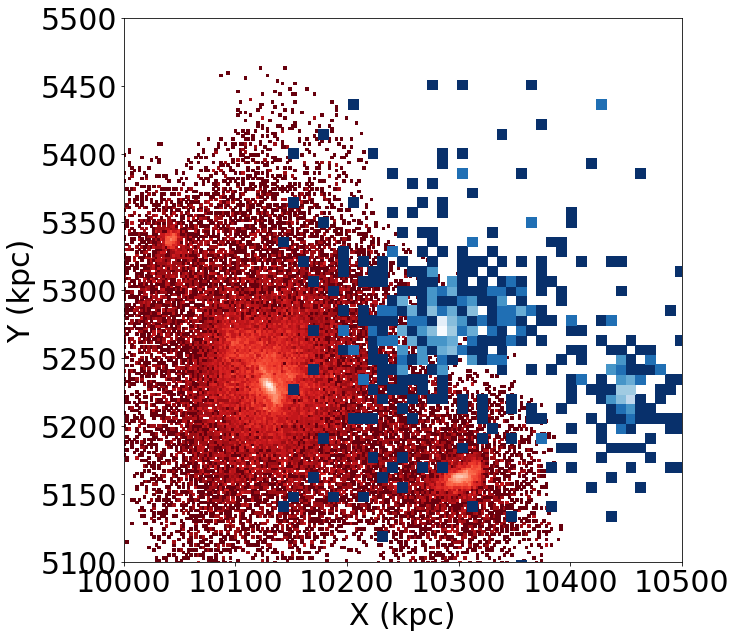

In [8]:
Nbin_low=50
Nbin_high=200
compare_low_high_histograms(0)
#compare_low_high_histograms(0)

Below are the list of properties
dict_keys(['count', 'GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200'])


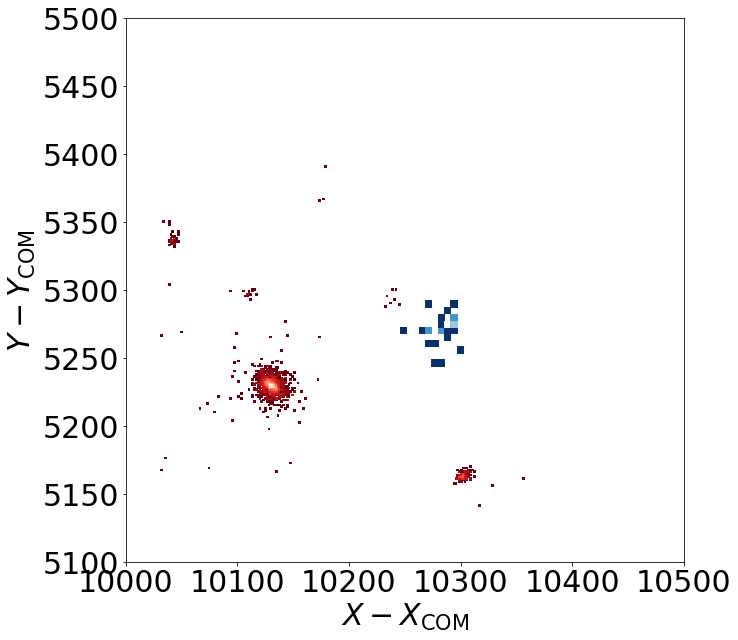

In [44]:
Nbin_low=10
Nbin_high=200
compare_low_high_histograms(4)
#compare_low_high_histograms(4)

Text(0, 0.5, '$Y-Y_{\\mathrm{COM}}$')

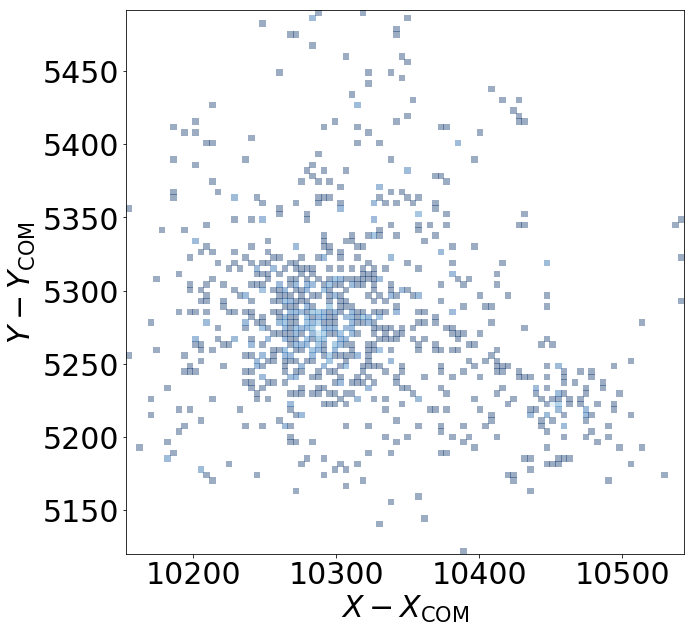

In [10]:
path_to_uniform_run='/ufrc/lblecha/aklantbhowmick/arepo_runs_aklant/'
scaled_halo_centers=[0.439,0.116,0.227]
uniform_run='L25n128MUSIC_rerun'
basePath_uniform=path_to_uniform_run+uniform_run+'/output/'
boxsize=arepo_package.get_box_size(basePath_uniform)
particle_property='Coordinates'
p_type=1
desired_redshift_of_selected_halo=0
index_of_selected_halo=100

group_particles,output_redshift=arepo_package.get_particle_property_within_groups(basePath_uniform,particle_property,p_type,desired_redshift_of_selected_halo,index_of_selected_halo,group_type='groups',list_all=True)
f,ax=plt.subplots(figsize=(10,10))
arepo_package.make_image(group_particles,group_particles,'xy',ax,boxsize,100,scaled_halo_centers,colormap='Blues_r',opacity=0.4,about_COM=False)
ax.tick_params(labelsize=30)
ax.set_xlabel('$X-X_{\mathrm{COM}}$',fontsize=30)
ax.set_ylabel('$Y-Y_{\mathrm{COM}}$',fontsize=30)

In [11]:



help(arepo_package.get_group_property)


Help on function get_group_property in module arepo_package:

get_group_property(output_path, group_property, desired_redshift, list_all=True)

Below are the list of properties
dict_keys(['count', 'GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200'])


In [12]:
basePath=path_to_output+run+'/output/'
GroupMass_zoom,output_redshift_zoom=arepo_package.get_group_property(basePath, 'GroupMass', desired_redshift, list_all=True)

Below are the list of properties
dict_keys(['count', 'GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200'])


In [13]:
diff_log_GroupMass=numpy.abs(numpy.log10(GroupMass_zoom*1e10)-logHaloMass_selected)

In [14]:
diff_log_GroupMass

array([0.02285671, 0.28705883, 0.25467968, 0.91196823, 0.68017006,
       0.65669346, 0.53393936, 1.1520214 , 1.1500998 , 1.4378643 ,
       1.5936394 , 1.6408863 , 1.6579561 , 1.6518164 , 0.5839243 ,
       1.6813745 , 0.80116844, 1.7835894 , 1.2623835 , 1.8891621 ,
       2.05229   , 1.9660921 , 2.0410995 , 1.9914665 , 1.9019403 ,
       2.050105  , 2.1525345 , 2.0691671 , 2.1279955 , 2.1986294 ,
       1.4373636 , 2.2147942 , 2.1677818 , 2.2228088 , 2.2517967 ,
       2.262144  , 1.4421082 , 1.4823561 , 1.4413624 , 1.8699455 ,
       2.469098  , 1.1890497 , 2.3954449 , 2.4358501 , 2.234767  ,
       2.4463139 , 2.4497442 , 1.6244965 , 2.4736853 , 2.5553198 ,
       2.5028276 , 2.2414055 , 2.4700212 , 2.5500364 , 1.7415657 ,
       2.240429  , 1.8989706 , 2.50002   , 2.5555344 , 1.8998308 ,
       1.981082  , 2.6349878 , 2.684291  , 2.748414  , 2.6498718 ,
       1.8094664 , 2.6466198 , 2.6711884 , 2.041771  , 2.6606045 ,
       1.8588047 , 2.7536535 , 2.029831  , 2.1358557 , 2.73762

In [16]:
indices

(array([0]),)

Text(0, 0.5, '$Y-Y_{\\mathrm{COM}}$')

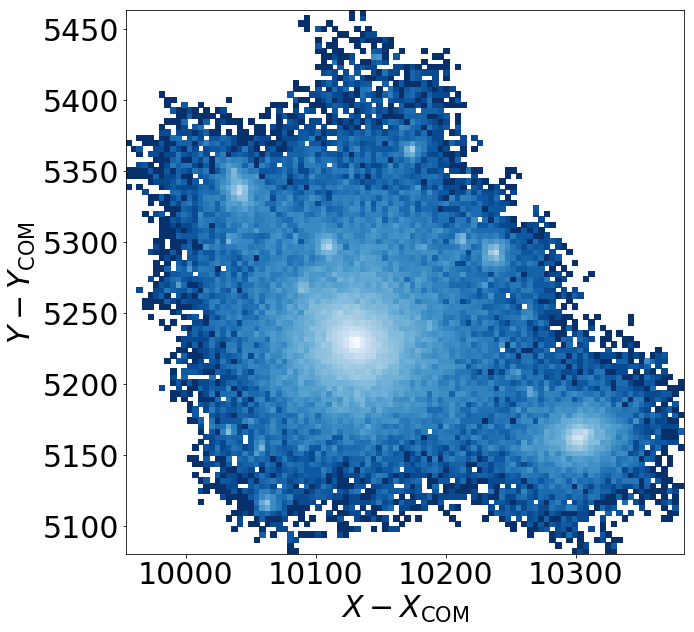

In [17]:
particle_property='Coordinates'
p_type=1
desired_redshift_of_selected_halo=0
index_of_selected_halo=indices[0][0]

group_particles_zoom,output_redshift=arepo_package.get_particle_property_within_groups(basePath,particle_property,p_type,desired_redshift_of_selected_halo,index_of_selected_halo,group_type='groups',list_all=False)
#group_particles_zoom,output_redshift=arepo_package.get_particle_property(basePath,particle_property,p_type,desired_redshift_of_selected_halo,list_all=False)

f,ax=plt.subplots(figsize=(10,10))
arepo_package.make_image(group_particles_zoom,group_particles_zoom,'xy',ax,boxsize,100,scaled_halo_centers,colormap='Blues_r',opacity=1,about_COM=False,REPOSITION=True)
ax.tick_params(labelsize=30)
ax.set_xlabel('$X-X_{\mathrm{COM}}$',fontsize=30)
ax.set_ylabel('$Y-Y_{\mathrm{COM}}$',fontsize=30)


Text(0, 0.5, '$Y-Y_{\\mathrm{COM}}$')

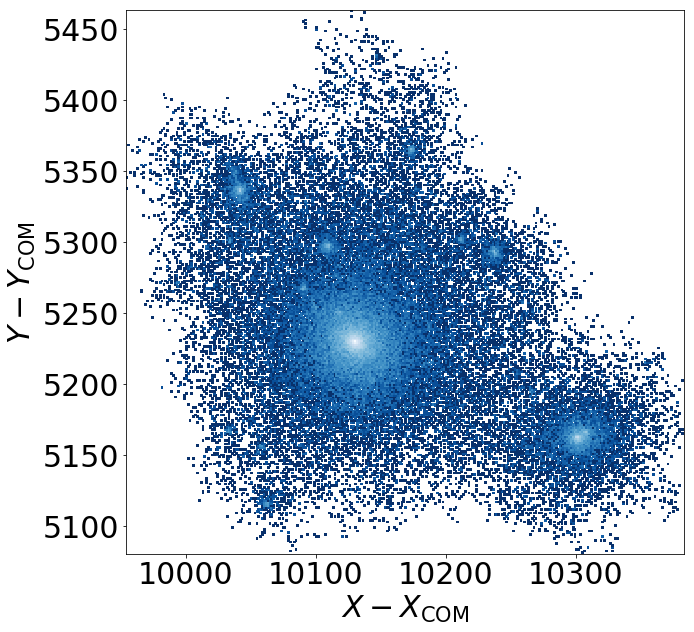

In [18]:
f,ax=plt.subplots(figsize=(10,10))
arepo_package.make_image(group_particles_zoom,group_particles_zoom,'xy',ax,boxsize,300,scaled_halo_centers,colormap='Blues_r',opacity=1,about_COM=False,REPOSITION=True)
ax.tick_params(labelsize=30)
ax.set_xlabel('$X-X_{\mathrm{COM}}$',fontsize=30)
ax.set_ylabel('$Y-Y_{\mathrm{COM}}$',fontsize=30)

(10000, 10500)

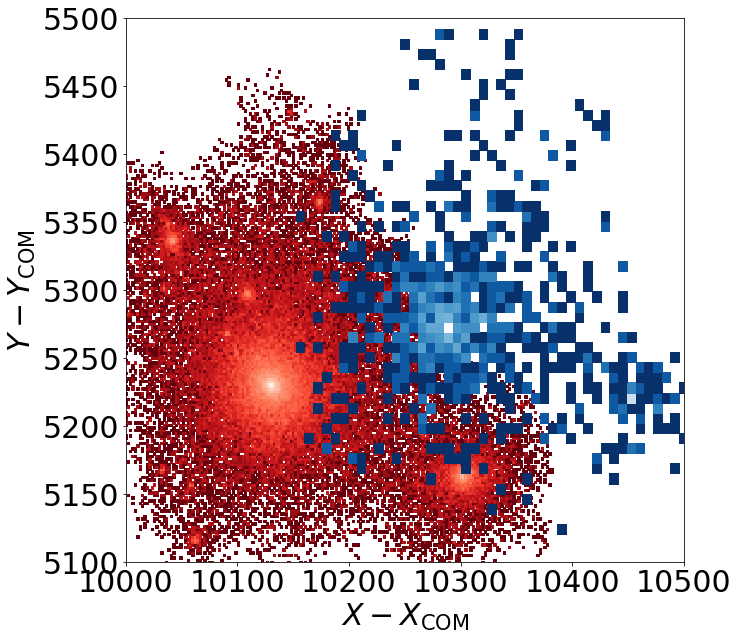

In [31]:
f,ax=plt.subplots(figsize=(10,10))

arepo_package.make_image(group_particles_zoom,group_particles_zoom,'xy',ax,boxsize,200,scaled_halo_centers,colormap='Reds_r',opacity=1,about_COM=False,REPOSITION=True)

arepo_package.make_image(group_particles,group_particles,'xy',ax,boxsize,50,scaled_halo_centers,colormap='Blues_r',opacity=1,about_COM=False)


ax.tick_params(labelsize=30)
ax.set_xlabel('$X-X_{\mathrm{COM}}$',fontsize=30)
ax.set_ylabel('$Y-Y_{\mathrm{COM}}$',fontsize=30)

ax.set_ylim(5100,5500)
ax.set_xlim(10000,10500)

In [9]:
def get_property(basePath,desired_redshift,subhalo_index):   
    MassByType,output_redshift=arepo_package.get_group_property(basePath, group_property, desired_redshift, list_all=True)
    return MassByType[subhalo_index]

In [10]:
path_to_output='/ufrc/lblecha/aklantbhowmick/NEW_AREPO_RUNS/'

run='L25n128MUSIC_rerun_zoom_levelmax9_haloindex100_redshift0.00/AREPO/'

output_folder='/output_previous_2'



basePath=path_to_output+run+output_folder

group_property='GroupMassType'



get_property(basePath,0,0)

Below are the list of properties
dict_keys(['count', 'GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200'])


array([6.2767272e+00, 6.0133240e+01, 0.0000000e+00, 0.0000000e+00,
       1.3394258e+00, 7.7847173e-03], dtype=float32)

In [11]:
path_to_output='/ufrc/lblecha/aklantbhowmick/arepo_runs_aklant/'

run='L25n128MUSIC_rerun'

output_folder='/output'
basePath=path_to_output+run+output_folder


get_property(basePath,0,100)

Below are the list of properties
dict_keys(['count', 'GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200'])


array([6.1421638e+00, 5.7858429e+01, 0.0000000e+00, 0.0000000e+00,
       2.4151188e-01, 4.1244533e-02], dtype=float32)

In [29]:
path_to_output='/ufrc/lblecha/aklantbhowmick/NEW_AREPO_RUNS/'

run='L25n128MUSIC_rerun_zoom_levelmax9_haloindex100_redshift0.00/AREPO/'

output_folder='/output_previous_2'

basePath=path_to_output+run+output_folder

particle_property='Coordinates'

Coordinates,output_redshift=arepo_package.get_particle_property(basePath,particle_property,2,0)

particle_property='Masses'

Masses,output_redshift=arepo_package.get_particle_property(basePath,particle_property,2,0)




Desired redshift:  0
Output redshift:  2.220446049250313e-16
Output snapshot:  20
Below are the list of properties for ptype  2
dict_keys(['count', 'Coordinates', 'Masses', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'SubfindDensity', 'SubfindHsml', 'SubfindVelDisp', 'Velocities'])
Desired redshift:  0
Output redshift:  2.220446049250313e-16
Output snapshot:  20
Below are the list of properties for ptype  2
dict_keys(['count', 'Coordinates', 'Masses', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'SubfindDensity', 'SubfindHsml', 'SubfindVelDisp', 'Velocities'])


In [30]:
group_property='GroupPos'
group_position,output_redshift=arepo_package.get_group_property(basePath, group_property, desired_redshift, list_all=True)

group_property='GroupMass'
group_mass,output_redshift=arepo_package.get_group_property(basePath, group_property, desired_redshift, list_all=True)


group_position=group_position[0]
group_mass=group_mass[0]*1e10

Below are the list of properties
dict_keys(['count', 'GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200'])
Below are the list of properties
dict_keys(['count', 'GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200'])


In [55]:
def min_dis(median_position, position,box_size):
        pos_1=position-median_position
        pos_2=position-median_position+box_size
        pos_3=position-median_position-box_size

        new_position_options=numpy.array([pos_1,pos_2,pos_3])
        get_minimum_distance=numpy.argmin(numpy.abs(new_position_options))
        #print(new_position_options)

        print(get_minimum_distance)
        
        return numpy.sum(new_position_options[get_minimum_distance]**2)

In [56]:
[min_dis(group_position,coordinate,arepo_package.get_box_size(basePath)) for coordinate in Coordinates[::1000]]

2
1
1
2
2
2
1
1
2
1
1
2
1
2
2
2
2
1
2
2
1
2
2
2
2
2
2
2
2
2
0
2
2
2
2
2
0
2
2
2
0
2
2
2
2
0
2
0
1
0
2
2
0
2
0
2
1
0
0
0
0
1
2
0
0
2
1
2
0
1
2
1
2
0
1
2
1
2
1
2
2
1
1
2
1
2
1
1
1
1
1
2
1
1
1
2
2
1
2
2
1
2
2
2
2
2
2
1
1
1
2
2
1
1
1
2
2
2
2
2
2
2
2
1
1
1
2
2
1
1
1
2
2
2
0
2
2
2
2
1
1
1
1
2
1
1
1
2
2
2
1
1
2
2
2
1
1
1
2
2
1
1
1
2
2
2
1
1
2
2
2
1
1
1
2
2
1
1
1
2
2
2
1
1
2
2
2
1
1
1
2
2
1
1
1
2
2
2
1
1
2
2
2
2
1
1
2
2
1
1
1
2
2
2
1
1
2
2
2
2
1
2
1
2
1
1
1
2
2
2
1
1
2
2
2
2
0
2
2
2
1
1
1
2
2
1
1
1
2
2
2
0
0
2
2
2
1
1
1
2
2
2
1
1
2
2
2
0
0
2
2
1
1
1
1
2
2
2
1
1
2
2
2
0
0
2
2
2
1
1
1
2
2
2
1
1
2
2
2
0
0
2
2
2
1
1
1
2
2
2
1
1
2
2
2
0
0
2
2
2
1
1
1
2
2
2
1
1
2
2
2
0
0
2
2
2
1
1
1
2
2
2
1
1
1
2
2
0
0
2
2
2
1
1
1
2
2
2
1
1
2
2
2
0
0
2
2
2
1
1
1
2
1
2
1
1
2
2
2
0
0
2
2
2
2
1
1
1
2
2
1
1
2
2
2
0
0
2
2
2
0
0
1
1
2
1
1
1
2
2
2
2
0
2
2
2
0
0
1
1
2
1
1
1
2
2
2
2
1
2
2
2
0
0
1
1
2
1
1
1
2
2
2
2
1
2
2
2
0
0
1
2
2
1
1
1
2
2
2
1
1
2
2
2
0
0
1
2
1
1
1
1
2
2
2
1
1
2
2
2
0
0
0
2
2
1
1
1
2
2
2
1
1
2
2
2
0
0
0
2


IndexError: index 4 is out of bounds for axis 0 with size 3

In [38]:
arepo_package.get_box_size(basePath)

25000.0

In [51]:
 Coordinates[::1000]

array([[ 8647.71712412, 10601.36359303, 11362.61227598],
       [ 7382.67933003, 14332.34407671, 12736.30983176],
       [ 8828.8461325 , 15056.17204187, 12419.25576689],
       ...,
       [  429.60016773, 20154.21512665,  1770.18688156],
       [  259.95636587, 22423.68073936, 22641.18217945],
       [23453.23813657, 24031.56861481, 14858.61026336]])